<a href="https://colab.research.google.com/github/PattarapornH/cats-dogs-classifier/blob/master/cats_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.utils import np_utils
from google.colab import drive

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
!ls 'gdrive/My Drive/Colab Notebooks/cats_dogs/'

cats_dogs_classifier.ipynb  meaw.PNG  tintin2.jpg  tong.png
epoch50.h5		    test_set  tintin.jpg   training_set


In [0]:
!pip install -U -q PyDrive

In [0]:
# collect training data path
path_train = 'gdrive/My Drive/Colab Notebooks/cats_dogs/training_set/'
path_cats_train = []
path_dogs_train = []
for path in os.listdir(path_train + 'cats'):
  path_cats_train.append(os.path.join(path_train+'cats', path))
for path in os.listdir(path_train + 'dogs'):
  path_dogs_train.append(os.path.join(path_train+'dogs', path))

In [18]:
len(path_cats_train),len(path_dogs_train)

(4000, 4005)

In [19]:
# load training data
X_train = []
j = 0
k = 0
for i in range(6000):
  if(i%50 == 0):
    print('.', end='')
  if(i%3000 == 0 and i != 0):
    print('\n')
# i%2 == 0 ? cat:dog
  try:
    if(i%2 == 0 and j < len(path_cats_train)):
      path = path_cats_train[j]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
      j+=1
    if(i%2 == 1 and k < len(path_dogs_train)):
      path = path_dogs_train[k]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print(i)
    print(j)
    print(k)
    break
print("\nLoad training data complete")

.............................................................

...........................................................
Load training data complete


In [20]:
nb_train_samples = len(X_train)
nb_train_samples

6000

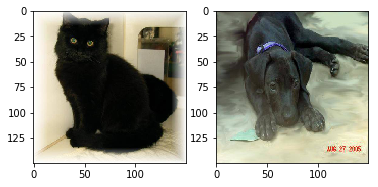

In [21]:
plt.subplot(121)
plt.imshow(X_train[0]/255)
plt.subplot(122)
plt.imshow(X_train[1]/255)

In [22]:
X_train = np.array(X_train)
X_train.shape

(6000, 150, 150, 3)

In [0]:
# collect test data path
path_test = 'gdrive/My Drive/Colab Notebooks/cats_dogs/test_set/'
path_cats_test = []
path_dogs_test = []
for path in os.listdir(path_test + 'cats'):
  path_cats_test.append(os.path.join(path_test+'cats', path))
for path in os.listdir(path_test + 'dogs'):
  path_dogs_test.append(os.path.join(path_test+'dogs', path))

In [24]:
len(path_cats_test),len(path_dogs_test)

(1011, 1012)

In [43]:
# load test data
X_test = []
j = 0
k = 0
for i in range(1000):
  if(i%10 == 0):
    print('.', end='')
  if(i == 500):
    print('\n')
  try:
    if(i%2 == 0):
      path = path_cats_test[j]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
      j+=1
    elif(i%2 == 1):
      path = path_dogs_test[k]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print(i)
    break
print('\nload test data complete')

...................................................

.................................................
load test data complete


(1000, 150, 150, 3)


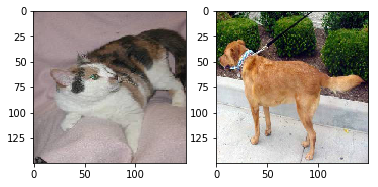

In [44]:
X_test = np.array(X_test)
print(X_test.shape)
plt.subplot(121)
plt.imshow(X_test[0]/255)
plt.subplot(122)
plt.imshow(X_test[1]/255)

In [45]:
print(j,k)

500 500


In [46]:
# load validation data
X_valid = []
for i in range(0,1000):
  if(i%10 == 0):
    print('.', end='')
  if(i == 500):
    print('\n')
  try:
    if(i%2 == 0):
      path = path_cats_test[j]
      img = load_img(path, target_size=(150, 150))
      X_valid.append(img_to_array(img))
      j+=1
    if(i%2 == 1):
      path = path_dogs_test[k]
      img = load_img(path, target_size=(150, 150))
      X_valid.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print("j",j)
    print("k",k)
    print(i)
    break
print('\nload valid data complete')

...................................................

.................................................
load valid data complete


(1000, 150, 150, 3)


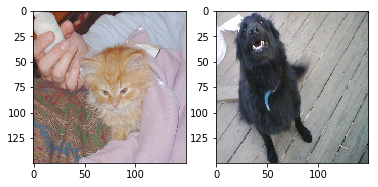

In [48]:
X_valid = np.array(X_valid)
print(X_valid.shape)
plt.subplot(121)
plt.imshow(X_valid[0]/255)
plt.subplot(122)
plt.imshow(X_valid[1]/255)

In [49]:
# init y --> 0 = cat, 1 = dog
y_train = []
y_test = []
y_valid = []
for i in range(6000):
  if(i < 1000):
    y_train.append(i%2)
    y_test.append(i%2)
    y_valid.append(i%2)
  else :
    y_train.append(i%2)
    
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)
print('Init label data complete')

Init label data complete


In [0]:
# preprocessing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32)

test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32)

valid_generator = test_datagen.flow(
    X_valid,
    y_valid,
    batch_size=32)

<Figure size 432x288 with 0 Axes>

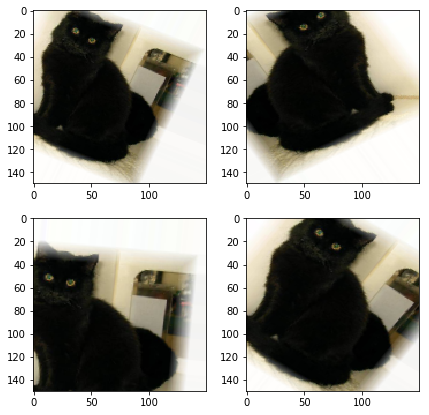

In [51]:
plt.clf()
fnames = [os.path.join(path_train+'cats', fname) for fname in os.listdir(path_train+'cats')]
img_path = fnames[0]

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.figure(figsize=(7,7))

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [103]:
# Init CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

# Pooling
model.add(MaxPooling2D((2, 2)))

# Second layer of convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third layer of convolution
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Dropout
model.add(Dropout(0.5))

# Full Connection
model.add(Dense(512, activation='relu'))

# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 36992)             0         
__________

In [104]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

train_model = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 50,
    validation_data=valid_generator,
    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 16s 155ms/step - loss: 0.8279 - acc: 0.5200 - val_loss: 0.6802 - val_acc: 0.6186
Epoch 2/50
100/100 [==============================] - 15s 146ms/step - loss: 0.7044 - acc: 0.5559 - val_loss: 0.6560 - val_acc: 0.5990
Epoch 3/50
100/100 [==============================] - 15s 146ms/step - loss: 0.6767 - acc: 0.5950 - val_loss: 0.6378 - val_acc: 0.6695
Epoch 4/50
100/100 [==============================] - 15s 147ms/step - loss: 0.6534 - acc: 0.6269 - val_loss: 0.6663 - val_acc: 0.5685
Epoch 5/50
100/100 [==============================] - 15s 151ms/step - loss: 0.6399 - acc: 0.6369 - val_loss: 0.6007 - val_acc: 0.6714
Epoch 6/50
100/100 [==============================] - 16s 156ms/step - loss: 0.6344 - acc: 0.6500 - val_loss: 0.5701 - val_acc: 0.7030
Epoch 7/50
100/100 [==============================] - 15s 146ms/step - loss: 0.6049 - acc: 0.6750 - val_loss: 0.6456 - val_acc: 0.6630
Epoch 8/50
100/100 [==============================] - 1

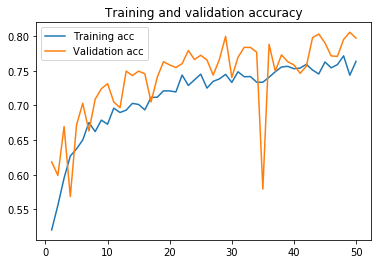

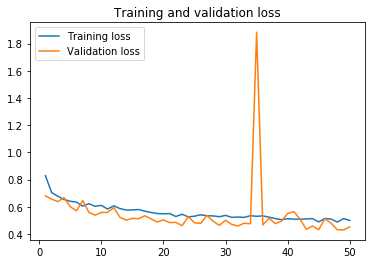

In [110]:
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted = model.predict_classes(X_test)

In [112]:
corrected = []
incorrected = []
for i in range(len(predicted)):
    if(predicted[i] == y_test[i]):
        corrected.append(int(i))
    else:
        incorrected.append(int(i))
corr = len(corrected)
incorr = len(incorrected)
print(corr,incorr)

725 275


In [0]:
prob = model.predict_proba(X_test)

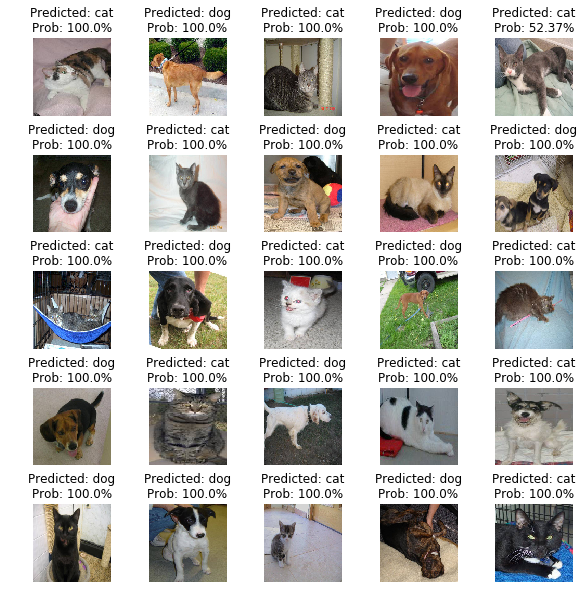

In [121]:
plt.figure(figsize=(10,10))
proba = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
    if(predicted[i] == 0):
        res = 'cat'
        proba = round(float(1-prob[i][0])*100.0,2)  # probability assigned to class 1 in sigmoid
    else:
        res = 'dog'
        proba = round((float(prob[i][0]))*100.0,2)
        
    title = "Predicted: "+res+"\nProb: "+str(proba)+"%"
    plt.title(title)
    plt.axis('off')
    plt.imshow(X_test[i]/255)

In [0]:
test = []
img = load_img('gdrive/My Drive/Colab Notebooks/cats_dogs/meaw.PNG', target_size=(150, 150))
test.append(img_to_array(img))

In [0]:
test2 = [0]

In [124]:
test = np.array(test)
test.shape

(1, 150, 150, 3)

In [0]:
p = model.predict(test)

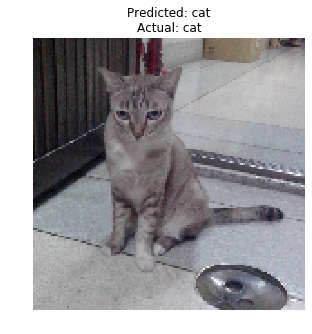

In [126]:
plt.figure(figsize=(5,5))
if(p[0] == 0):
    res = 'cat'
else:
    res = 'dog'

title = "Predicted: "+res+"\nActual: cat"
# title = "Predicted: "+res+"\nProb: "+str(prob[i][0])
plt.title(title)
plt.axis('off')
plt.imshow(test[0]/255)

In [0]:
model.save('gdrive/My Drive/Colab Notebooks/cats_dogs/epoch50_valid.h5')